# Part I. Data analysis

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

## Downloading data

This data is provided by Deep Learning School of MIPT University (url: https://www.kaggle.com/c/advanced-dls-spring-2021/data

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Random rows
data.sample(n=15)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1732,7,24.70,149.05,Female,0,Yes,Yes,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
3966,1,18.80,18.8,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
372,46,84.80,3958.85,Female,0,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),0
3630,1,79.35,79.35,Female,0,No,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1
3698,2,20.45,34.8,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1415,71,108.05,7532.15,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,1
2000,19,95.90,1777.9,Male,1,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1
3395,70,105.55,7195.35,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
2142,7,20.45,150.75,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


In [ ]:
# Numerical columns
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Categorical columns
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# Count total number of NaNs in a DataFrame
nans = pd.DataFrame(data.isnull().sum())
nans.columns =['NaNs']
nans

,NaNs
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


## Data analysis & visualizations

In [ ]:
# Converting to the appropriate format for further analysis

data['TotalSpent'] = pd.to_numeric(data['TotalSpent'],errors = 'coerce')
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent         float64
dtype: object

In [ ]:
# Check for NaNs after converting

data.isna().mean()

ClientPeriod                0.000000
MonthlySpending             0.000000
TotalSpent                  0.001704
Sex                         0.000000
IsSeniorCitizen             0.000000
HasPartner                  0.000000
HasChild                    0.000000
HasPhoneService             0.000000
HasMultiplePhoneNumbers     0.000000
HasInternetService          0.000000
HasOnlineSecurityService    0.000000
HasOnlineBackup             0.000000
HasDeviceProtection         0.000000
HasTechSupportAccess        0.000000
HasOnlineTV                 0.000000
HasMovieSubscription        0.000000
HasContractPhone            0.000000
IsBillingPaperless          0.000000
PaymentMethod               0.000000
Churn                       0.000000
dtype: float64

In [ ]:
data = data.dropna()

In [ ]:
data[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


Text(0.5, 1.0, 'ClientPeriod')

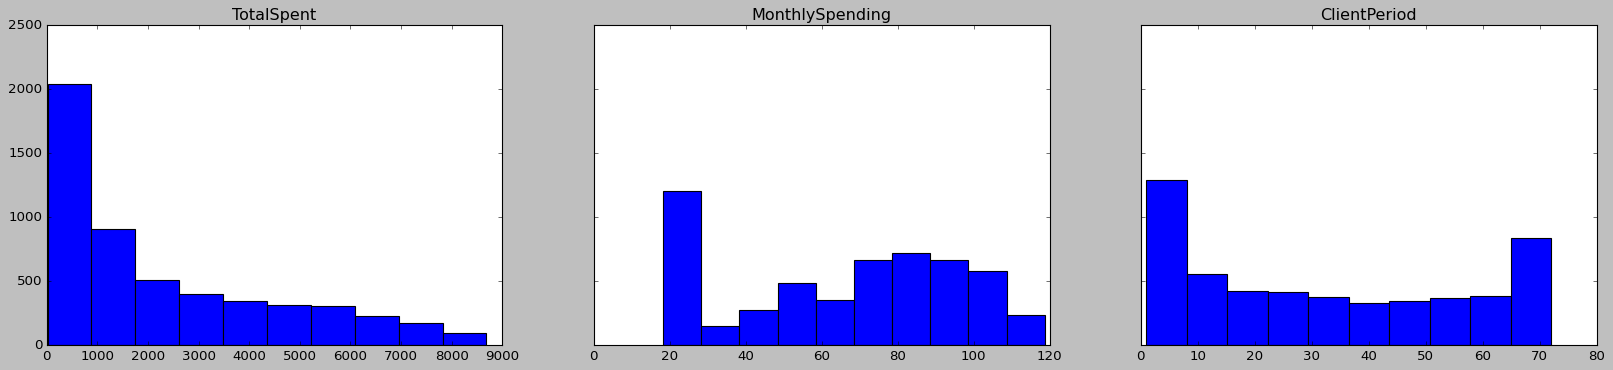

In [ ]:
# Frequencies for num features

plt.style.use("classic")
fig, axs = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
axs[0].hist(data['TotalSpent']);
axs[0].set_title('TotalSpent')
axs[1].hist(data['MonthlySpending']);
axs[1].set_title('MonthlySpending')
axs[2].hist(data['ClientPeriod']);
axs[2].set_title('ClientPeriod')

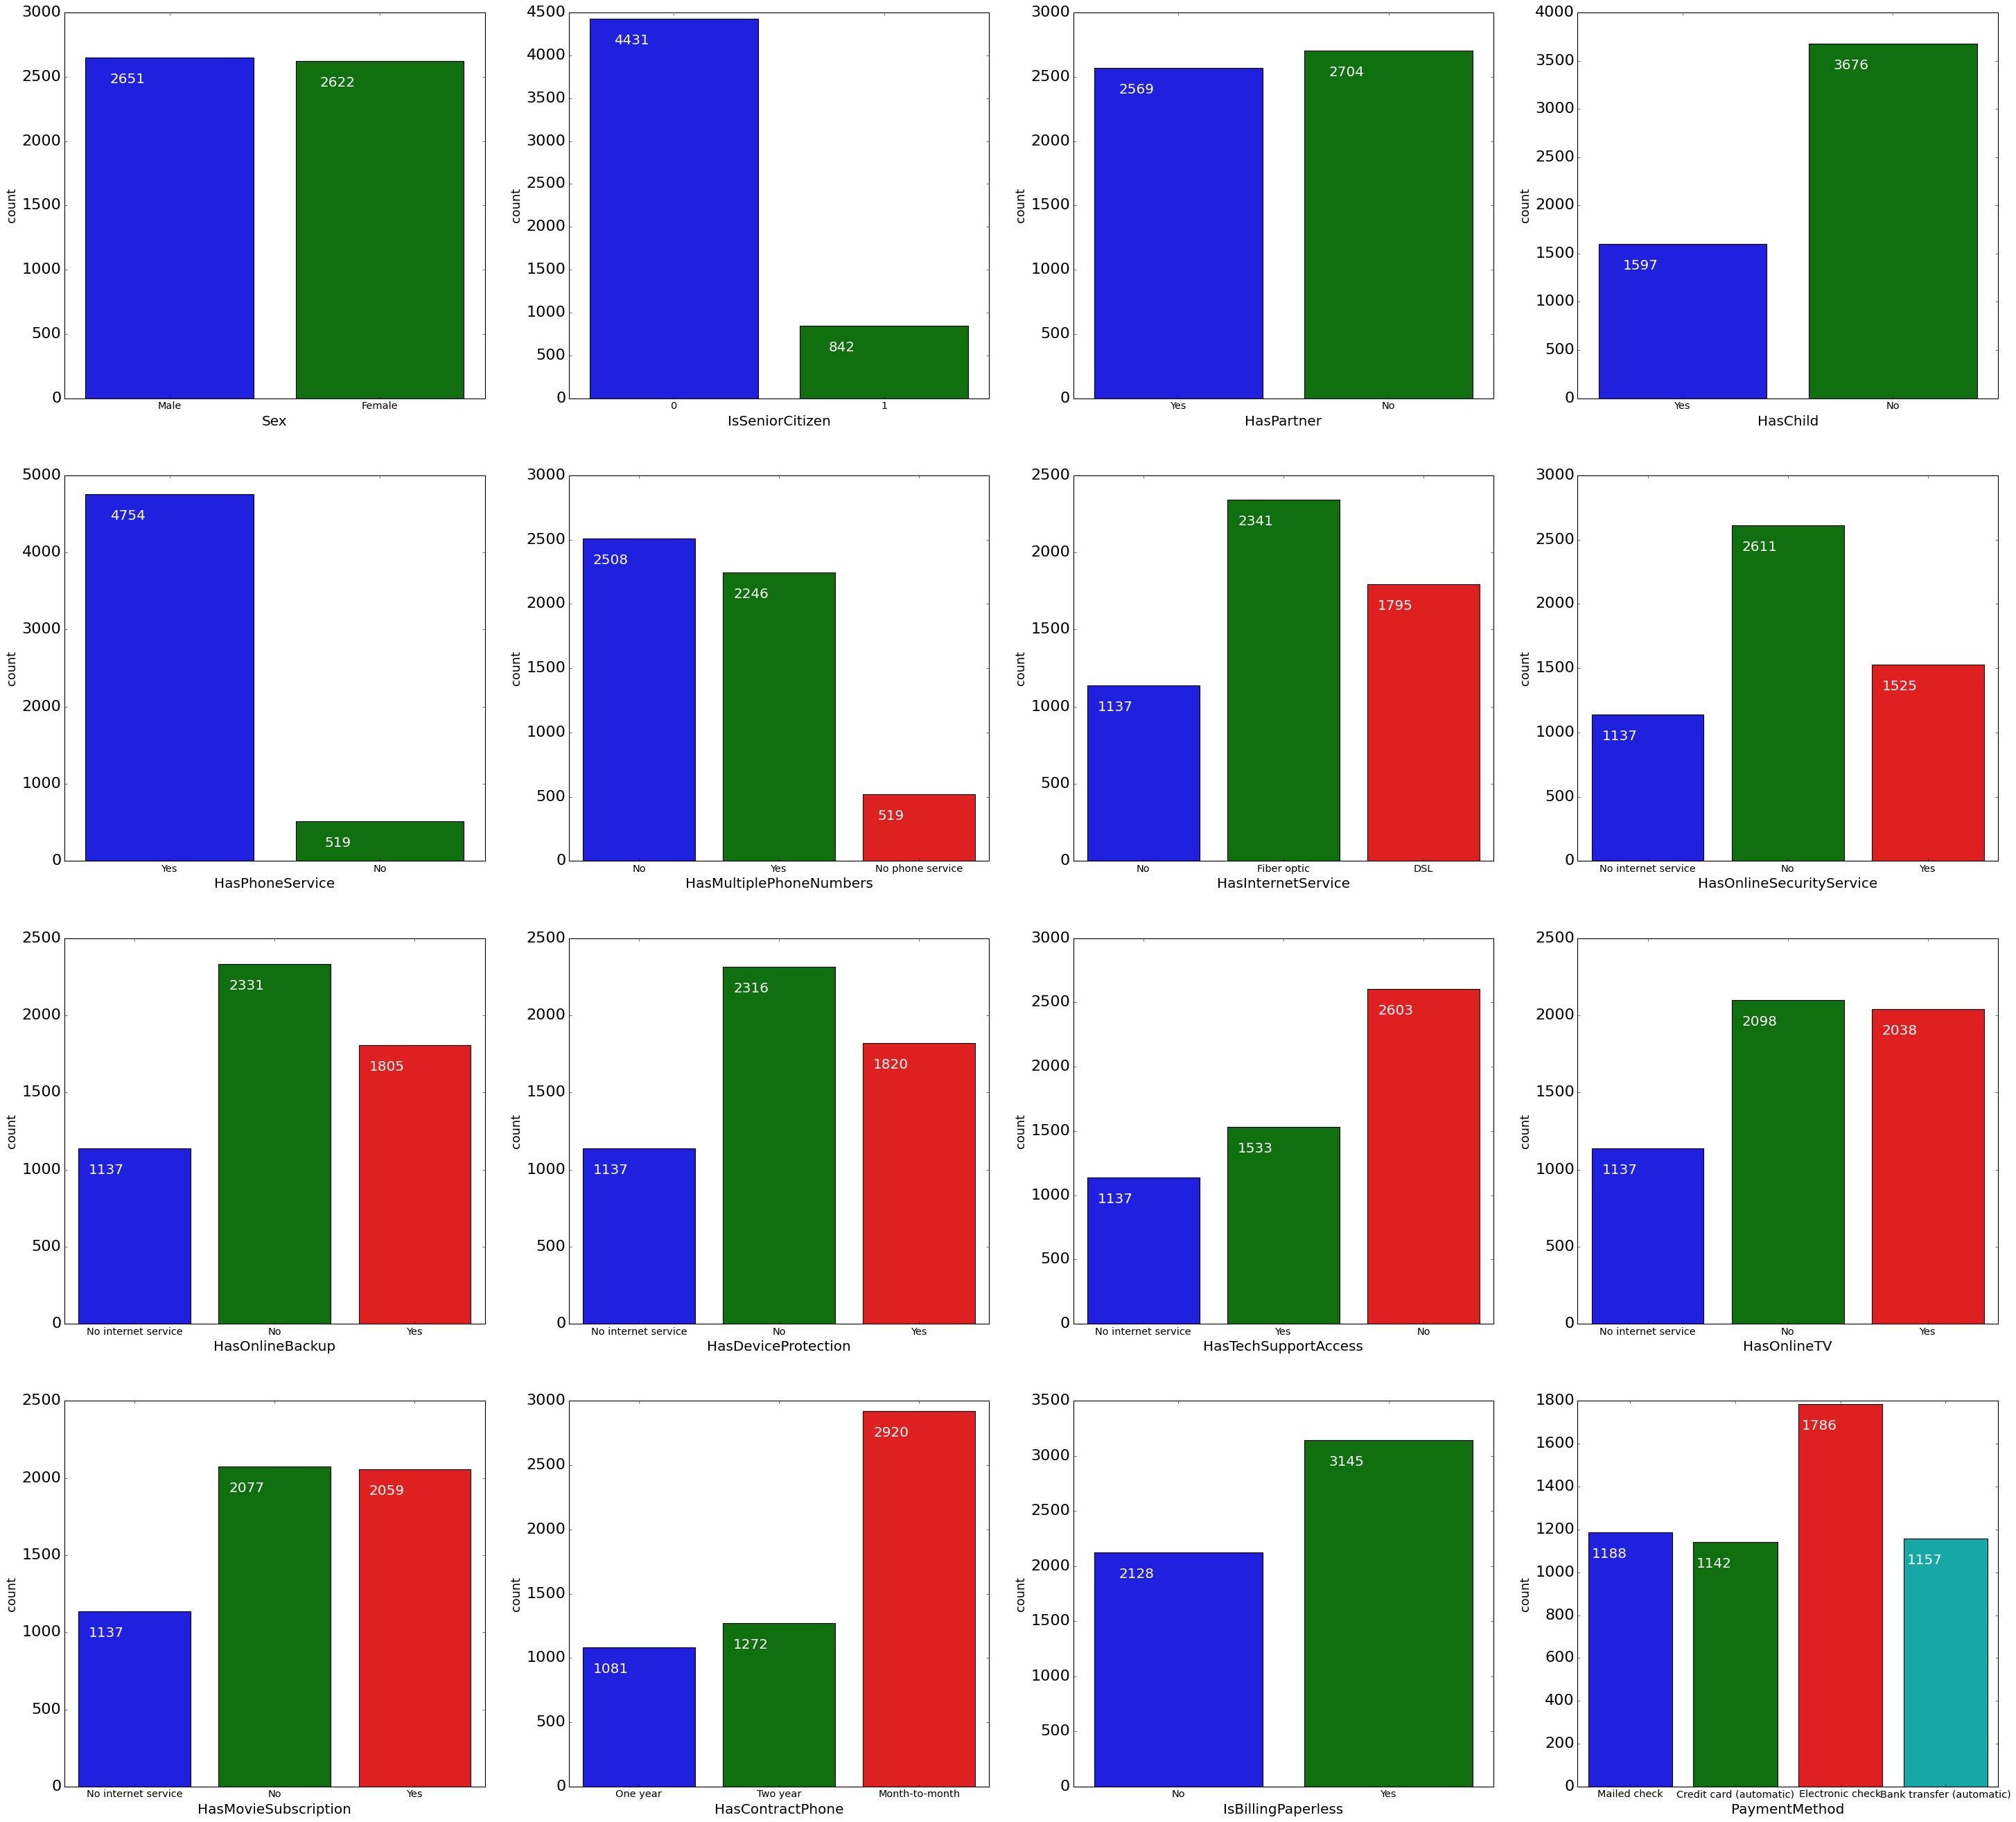

In [ ]:
#  Count the number of each value for each feature of Categorical Data

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(45,40), frameon=False)
warnings.simplefilter(action="ignore", category=FutureWarning)

for i in cat_cols:
    plt.subplot(a, b, c)
    plt.xticks(size=13)
    plt.yticks(size=20)
    plt.xlabel('xlabel', fontsize=18)
    plt.ylabel('ylabel', fontsize=16)
    ax = sns.countplot(data[cat_cols][i])
    c = c + 1
    for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

plt.show()

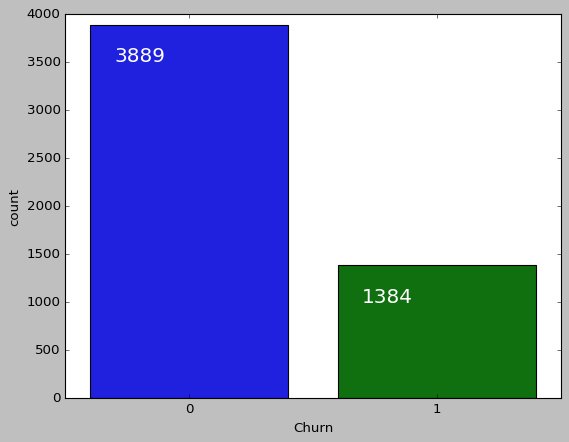

In [ ]:
# Check for unbalanced features

ax = sns.countplot(data['Churn'])
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

In [ ]:
# For the parameter scale_pos_weight in further CatBoost implementation

3889/1384

2.809971098265896

## Linear models

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, make_scorer

In [ ]:
# Getting dummies

X_dummy = pd.get_dummies(data[cat_cols])

In [ ]:
X = pd.concat([data[num_cols], X_dummy], axis=1)
y = data[target_col]
X.head()



,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [ ]:
grid_search = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression()),
                               param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]},
                               cv=5,
                               scoring='roc_auc',
                               verbose=10)
grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.862, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.837, total=   0.1s
[CV] logisticregression__C=100 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........... logisticregression__C=100, score=0.835, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.855, total=   0.1s
[CV] logisticregression__C=100 .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV] ........... logisticregression__C=100, score=0.835, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.862, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.837, total=   0.1s
[CV] logisticregression__C=10 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s


[CV] ............ logisticregression__C=10, score=0.835, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.855, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.836, total=   0.1s
[CV] logisticregression__C=1 .........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


[CV] ............. logisticregression__C=1, score=0.862, total=   0.1s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.836, total=   0.1s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.835, total=   0.1s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.856, total=   0.1s
[CV] logisticregression__C=1 .........................................
[CV] ............. logisticregression__C=1, score=0.835, total=   0.1s
[CV] logisticregression__C=0.1 .......................................
[CV] ........... logisticregression__C=0.1, score=0.860, total=   0.1s
[CV] logisticregression__C=0.1 .......................................
[CV] ........... logisticregression__C=0.1, score=0.835, total=   0.1s
[CV] logisticregression__C=0.1 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_clas

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'logisticregression__C': 100}
0.844816238854345
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


Best results



**roc_auc = 0.844816238854345,**

**C = 100**

## Gradient Boosting

In [ ]:
X = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Churn'], 
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
# CatBoost with standard parameters

params = {'eval_metric':'AUC', # metric
          'verbose': 10}

clf = CatBoostClassifier(**params, cat_features=cat_cols)



In [ ]:
clf.fit(X_train, y_train, 
        cat_features=cat_cols, 
        eval_set=(X_test, y_test)  
)

Learning rate set to 0.045218
0:	test: 0.8098349	best: 0.8098349 (0)	total: 67.4ms	remaining: 1m 7s
10:	test: 0.8258198	best: 0.8258198 (10)	total: 212ms	remaining: 19.1s
20:	test: 0.8304624	best: 0.8307172 (16)	total: 343ms	remaining: 16s
30:	test: 0.8339656	best: 0.8342298 (28)	total: 453ms	remaining: 14.2s
40:	test: 0.8357584	best: 0.8357584 (40)	total: 587ms	remaining: 13.7s
50:	test: 0.8381694	best: 0.8381741 (49)	total: 723ms	remaining: 13.5s
60:	test: 0.8380656	best: 0.8385232 (55)	total: 836ms	remaining: 12.9s
70:	test: 0.8383345	best: 0.8385232 (55)	total: 966ms	remaining: 12.6s
80:	test: 0.8397641	best: 0.8397641 (80)	total: 1.09s	remaining: 12.4s
90:	test: 0.8403114	best: 0.8403114 (90)	total: 1.21s	remaining: 12.1s
100:	test: 0.8406723	best: 0.8409766 (94)	total: 1.33s	remaining: 11.8s
110:	test: 0.8409177	best: 0.8409766 (94)	total: 1.45s	remaining: 11.6s
120:	test: 0.8408752	best: 0.8410828 (113)	total: 1.59s	remaining: 11.5s
130:	test: 0.8408186	best: 0.8410828 (113)	tot

In [ ]:
print('Results')
clf.best_score_

Results


{'learn': {'Logloss': 0.23309457386719745},
 'validation': {'AUC': 0.8416607690493041, 'Logloss': 0.4128669588013727}}

In [ ]:
# Just hyperparameters after simple brute force

params_new = {'eval_metric':'AUC', # metric
          'scale_pos_weight': 2.809971098265896,
          'max_depth': 3,
          'learning_rate': 0.01,
          #'l2_leaf_reg': 2,
          'n_estimators':1800,
          #'early_stopping_rounds': 50,
          'verbose': 10}

clf = CatBoostClassifier(**params_new, cat_features=cat_cols)

In [ ]:
clf.fit(X_train, y_train, 
        cat_features=cat_cols, 
        eval_set=(X_test, y_test)  
)

0:	test: 0.7852607	best: 0.7852607 (0)	total: 7.83ms	remaining: 14.1s
10:	test: 0.8094291	best: 0.8094291 (8)	total: 62.6ms	remaining: 10.2s
20:	test: 0.8265298	best: 0.8265298 (20)	total: 117ms	remaining: 9.91s
30:	test: 0.8257632	best: 0.8267138 (27)	total: 180ms	remaining: 10.3s
40:	test: 0.8249752	best: 0.8274310 (35)	total: 238ms	remaining: 10.2s
50:	test: 0.8229299	best: 0.8274310 (35)	total: 298ms	remaining: 10.2s
60:	test: 0.8228332	best: 0.8274310 (35)	total: 358ms	remaining: 10.2s
70:	test: 0.8232366	best: 0.8274310 (35)	total: 418ms	remaining: 10.2s
80:	test: 0.8245459	best: 0.8274310 (35)	total: 478ms	remaining: 10.1s
90:	test: 0.8253527	best: 0.8274310 (35)	total: 535ms	remaining: 10.1s
100:	test: 0.8259188	best: 0.8274310 (35)	total: 597ms	remaining: 10s
110:	test: 0.8266785	best: 0.8274310 (35)	total: 658ms	remaining: 10s
120:	test: 0.8287922	best: 0.8287922 (120)	total: 728ms	remaining: 10.1s
130:	test: 0.8302453	best: 0.8302453 (130)	total: 796ms	remaining: 10.1s
140:	

**Hyperparameters tuning (Bayesian)**

Random search и GRid search не обращают внимания на прошлые результаты при поиске лучших гиперпараметров. Байесовская оптимизация, в отличие от случайного поиска или поиска по сетке, отслеживает прошлые результаты оценки, которые она использует для формирования вероятностной модели, отображающей гиперпараметры в вероятность скора целевой функции. Есть несколько библиотек, которые могут это сделать. В этом кейсе решил воспользоваться optuna. Код позаимствован у Damir Atygaev: https://github.com/catboost/tutorials/blob/master/hyperparameters_tuning/hyperparameters_tuning_using_optuna_and_hyperopt.ipynb
Про байесовскую оптимизацию можно почитать тут:
https://habr.com/ru/company/antiplagiat/blog/528384/

In [ ]:
!pip install optuna
import optuna
from optuna.samplers import TPESampler
from catboost.utils import eval_metric
from math import log

In [ ]:
# In the first step we will split the data in training and remaining dataset
X_train, X_remaining, y_train, y_remaining = train_test_split(X, data['Churn'], train_size=0.8, random_state = 42)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state = 42)

print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(4218, 19)
(4218,)
(527, 19)
(527,)
(528, 19)
(528,)


(None, None)

In [ ]:
# Creating Catboost Pools for further analysis

numeric_train_pool = catboost.Pool(X_train[num_cols], y_train)
numeric_val_pool = catboost.Pool(X_test[num_cols], y_test)
numeric_test_pool = catboost.Pool(X_val[num_cols], y_val)


cat_train_pool = catboost.Pool(X_train, y_train, cat_features=cat_cols)
cat_val_pool = catboost.Pool(X_test, y_test, cat_features=cat_cols)
cat_test_pool = catboost.Pool(X_val, y_val, cat_features=cat_cols)

In [ ]:
# Function for evaluation quality

def calc_test_quality(train_pool=numeric_train_pool, val_pool=numeric_val_pool, test_pool=numeric_test_pool, **kwargs):
    model = catboost.CatBoostClassifier(**kwargs, random_seed=42)
    model.fit(train_pool, verbose=0)
    y_pred = model.predict_proba(test_pool)
    return eval_metric(test_pool.get_label(), y_pred[:, 1], 'AUC')

In [ ]:
# Initialization of optuna searching

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
    }

    model = catboost.CatBoostClassifier(**params, random_seed=42)
    model.fit(numeric_train_pool, verbose=0, eval_set=numeric_val_pool)
    y_pred = model.predict_proba(numeric_val_pool)
    return eval_metric(numeric_val_pool.get_label(), y_pred[:, 1], 'AUC')

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=20)

[I 2021-10-17 17:45:38,735] A new study created in memory with name: no-name-d003bd90-3add-4e79-b2f7-4f9cc05333fc
[I 2021-10-17 17:45:40,503] Trial 0 finished with value: 0.8178294573643411 and parameters: {'learning_rate': 0.07268222670380756, 'depth': 5, 'l2_leaf_reg': 3.041663082077828, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.8178294573643411.
[I 2021-10-17 17:46:23,843] Trial 1 finished with value: 0.8148471955081502 and parameters: {'learning_rate': 0.04807958141120149, 'depth': 10, 'l2_leaf_reg': 7.1634676472637695, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.8178294573643411.
[I 2021-10-17 17:46:27,256] Trial 2 finished with value: 0.8152260496201744 and parameters: {'learning_rate': 0.04088602145357825, 'depth': 8, 'l2_leaf_reg': 4.947150202116619, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.8178294573643411.
[I 2021-10-17 17:46:28,803] Trial 3 finished with value: 0.8182568825163684 and parameters: {'learning_rate': 0.07641958651588

In [ ]:
calc_test_quality(train_pool=numeric_train_pool,
                  val_pool=numeric_val_pool,
                  test_pool=numeric_test_pool,
                  **study.best_params), study.best_params

([0.8115239040164627],
 {'boosting_type': 'Ordered',
  'depth': 6,
  'l2_leaf_reg': 9.040502468054212,
  'learning_rate': 0.03810351006752188})

In [ ]:
# Cat features

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 0, 8)
    }

    model = catboost.CatBoostClassifier(**params, random_seed=42)
    model.fit(cat_train_pool, verbose=0, eval_set=cat_val_pool)
    y_pred = model.predict_proba(cat_val_pool)
    return eval_metric(cat_val_pool.get_label(), y_pred[:, 1], 'AUC')

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=20)

[I 2021-10-17 17:49:15,479] A new study created in memory with name: no-name-40a98f5d-b0c1-43b5-99dc-e9aae4baea96
[I 2021-10-17 17:49:26,466] Trial 0 finished with value: 0.8446212430300557 and parameters: {'learning_rate': 0.07268222670380756, 'depth': 5, 'l2_leaf_reg': 3.041663082077828, 'boosting_type': 'Plain', 'max_ctr_complexity': 3}. Best is trial 0 with value: 0.8446212430300557.
[I 2021-10-17 17:50:32,668] Trial 1 finished with value: 0.8464086573021702 and parameters: {'learning_rate': 0.0982687778546154, 'depth': 8, 'l2_leaf_reg': 5.328387113359248, 'boosting_type': 'Ordered', 'max_ctr_complexity': 6}. Best is trial 1 with value: 0.8464086573021702.
[I 2021-10-17 17:50:39,117] Trial 2 finished with value: 0.8433972528219774 and parameters: {'learning_rate': 0.0494715020211662, 'depth': 3, 'l2_leaf_reg': 4.582398297973883, 'boosting_type': 'Ordered', 'max_ctr_complexity': 1}. Best is trial 1 with value: 0.8464086573021702.
[I 2021-10-17 17:51:17,979] Trial 3 finished with val

In [ ]:
calc_test_quality(train_pool=cat_train_pool,
                  val_pool=cat_val_pool,
                  test_pool=cat_test_pool,
                  **study.best_params), study.best_params

([0.8448168154925955],
 {'boosting_type': 'Plain',
  'depth': 4,
  'l2_leaf_reg': 7.836090701530012,
  'learning_rate': 0.025895731673645297,
  'max_ctr_complexity': 6})

In [ ]:
# Implementing founded hyperparameters

X_train, X_test, y_train, y_test = train_test_split(X, data['Churn'], 
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
params_best = {'eval_metric':'AUC', # metric
          'scale_pos_weight': 2.809971098265896,
          'boosting_type': 'Plain',
          'depth': 4,
          'l2_leaf_reg': 7.836090701530012,
          'learning_rate': 0.025895731673645297,
          'max_ctr_complexity': 6}

clf = CatBoostClassifier(**params_best, cat_features=cat_cols)

In [ ]:
clf.fit(X_train, y_train, 
        cat_features=cat_cols, 
        eval_set=(X_test, y_test)  
)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	test: 0.7987049	best: 0.7987049 (0)	total: 10.1ms	remaining: 10.1s
1:	test: 0.8041354	best: 0.8041354 (1)	total: 18.1ms	remaining: 9.04s
2:	test: 0.8085350	best: 0.8085350 (2)	total: 26ms	remaining: 8.63s
3:	test: 0.8085539	best: 0.8085539 (3)	total: 30.9ms	remaining: 7.7s
4:	test: 0.8199127	best: 0.8199127 (4)	total: 38.3ms	remaining: 7.63s
5:	test: 0.8187261	best: 0.8199127 (4)	total: 46.1ms	remaining: 7.64s
6:	test: 0.8169191	best: 0.8199127 (4)	total: 53.8ms	remaining: 7.63s
7:	test: 0.8180349	best: 0.8199127 (4)	total: 62.3ms	remaining: 7.73s
8:	test: 0.8205732	best: 0.8205732 (8)	total: 71.1ms	remaining: 7.83s
9:	test: 0.8223024	best: 0.8223024 (9)	total: 78.7ms	remaining: 7.79s
10:	test: 0.8223543	best: 0.8223543 (10)	total: 87.7ms	remaining: 7.89s
11:	test: 0.8223449	best: 0.8223543 (10)	total: 92.8ms	remaining: 7.64s
12:	test: 0.8230479	best: 0.8230479 (12)	total: 100ms	remaining: 7.63s
13:	test: 0.8229394	best: 0.8230479 (12)	total: 108ms	remaining: 7.61s
14:	test: 0.82338

**0.77817** на тестовом датасете на kaggle

Параметры:

```
params_best = {'eval_metric':'AUC', # metric
          'scale_pos_weight': 2.809971098265896,
          'boosting_type': 'Plain',
          'depth': 4,
          'l2_leaf_reg': 7.836090701530012,
          'learning_rate': 0.025895731673645297,
          'max_ctr_complexity': 6}
```






# Prediction

In [ ]:
test_data = pd.read_csv('./test.csv')

In [ ]:
y_test_preds = (clf.predict(test_data) > 0.2).astype('int')

In [ ]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = y_test_preds
submission.to_csv('./my_submission.csv', index=False)

In [ ]:
my_submission = pd.read_csv('./my_submission.csv')
my_submission

,Id,Churn
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
1756,1756,0
1757,1757,0
1758,1758,1
1759,1759,1
